# ML: Intro to Unsupervised Learning, KMeans Revisited

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

# From Scratch

In [11]:
# make some dummy data sklearn.datasets import make_blobs
# 1
from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0, cluster_std=0.5)

# cluster_std: A lower value like 0.5 means that the data points within each cluster will be more tightly 
# grouped around their respective cluster centers.

In [8]:
data[:10]

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       [-1.41528725,  8.28928933],
       [-1.64417303,  2.48620447],
       [ 2.92558224,  0.75092113],
       [-0.880581  ,  3.67532341],
       [-1.29191987,  7.55847765],
       [ 0.75667532,  4.39445654],
       [ 0.9485938 ,  4.17181865]])

In [9]:
np.unique(y)

array([0, 1, 2, 3])

In [6]:
y[:20]

array([2, 0, 1, 3, 2, 1, 2, 3, 0, 0, 3, 3, 3, 3, 1, 3, 0, 2, 2, 2])

In [12]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [13]:
# Initialise centroids 
# Randomly choose 4 observations and those are gonna be our centroids.
# 2
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]   # had it been a pandas df, we'd have used sample function

In [26]:
data.shape[0]

2000

In [27]:
np.random.choice(range(data.shape[0]), size = (4, ))  # getting random indexes

array([1732,   47,  567, 1385])

In [28]:
data[np.random.choice(range(data.shape[0]), size = (4, ))]

array([[ 2.13604716,  1.67936603],
       [ 0.41285717,  3.93844845],
       [-2.42987214,  2.90822087],
       [ 0.48351471,  3.56786982]])

In [32]:
data.shape

(2000, 2)

In [30]:
centroids

array([[ 1.67408675,  0.17419349],
       [-2.38321867,  3.22435845],
       [-1.60555666,  3.05600219],
       [-1.49299698,  8.21723075]])

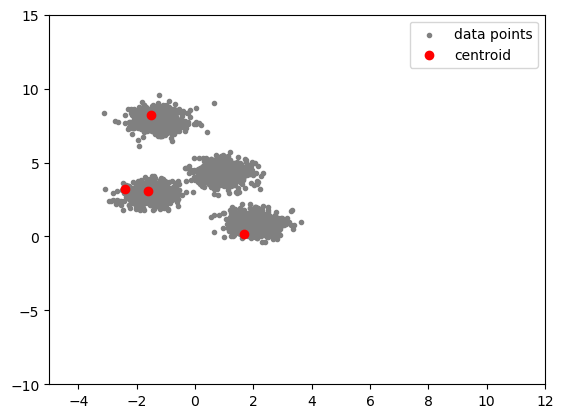

In [31]:
plot(data, centroids)

As you see, the centroids aren't really optimized.

In [33]:
data[0]

array([-0.99610393,  2.32543854])

In [46]:
# euclidean distance 3
sum((data[0] - centroids[0])**2)**0.5

3.428960997794342

In [35]:
(data[0] - centroids[0])**2

array([7.12991827, 4.62785525])

In [36]:
(data[0] - centroids[0])

array([-2.67019068,  2.15124505])

In [42]:
((data[0] - centroids[0])**2)

array([7.12991827, 4.62785525])

In [41]:
sum(((data[0] - centroids[0])**2))**0.5

3.428960997794342

In [43]:
sum(((data[0] - centroids[1])**2))**0.5

1.6529199368534837

In [44]:
sum(((data[0] - centroids[2])**2))**0.5

0.9513968011767767

In [45]:
sum(((data[0] - centroids[3])**2))**0.5

5.912708191084742

Looking at the distances, which centroid should the first datapoint belong to?<br>
3rd Centroid since the distance is the least.

In [47]:
# vectorized - 4
(((data - centroids[0])**2).sum(axis=1)**0.5)

array([3.428961  , 4.1278041 , 0.90940021, ..., 4.07838845, 4.15412976,
       4.07909417])

In [35]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((data - centroid)**2).sum(axis=1)**0.5).reshape(-1,1) # reshape to convert 1-d arr to 2-d array.
        dist = np.hstack([dist, distance])    # 4 columns for distances (from centroid)
    return dist

In [36]:
d = euclidean(data, centroids)

In [37]:
d

array([[3.65182531, 1.18877431, 5.55529966, 1.02033189],
       [3.88734622, 2.98963505, 3.92619873, 2.58714904],
       [0.26175227, 4.58156738, 7.48056958, 4.45867017],
       ...,
       [3.70568074, 3.64320718, 4.04034206, 3.25275635],
       [4.22444285, 1.42064981, 4.58447054, 1.01038255],
       [3.59232036, 4.2325409 , 4.29561347, 3.85342339]])

In [47]:
assigned_c = d.argmin(axis = 1) # 5

In [48]:
assigned_c

array([3, 3, 0, ..., 3, 3, 0], dtype=int64)

In [49]:
pd.Series(assigned_c).value_counts()

3    776
0    585
2    584
1     55
dtype: int64

In [54]:
assigned_c == 2

array([False, False, False, ..., False, False, False])

In [55]:
data

array([[-0.99610393,  2.32543854],
       [ 0.31831637,  4.07299503],
       [ 2.15418161,  0.94653906],
       ...,
       [ 1.00621742,  4.19752581],
       [-1.05850641,  3.3030477 ],
       [ 1.64016143,  4.25314658]])

In [41]:
data[assigned_c == 2].shape

(584, 2)

In [58]:
data[assigned_c == 2].mean(axis=0)  # mean of all the points assigned to cluster with index 2 (centroid)

array([-0.15679257,  3.65645866])

In [59]:
centroids   # centroids we assigned earlier.

array([[ 1.67408675,  0.17419349],
       [-2.38321867,  3.22435845],
       [-1.60555666,  3.05600219],
       [-1.49299698,  8.21723075]])

In [60]:
# -- closest centroid - complete

In [61]:
data_size = 1000
num_iters = 15
num_clusters = 4

In [56]:
np.zeros(len(data), dtype = np.int32)

array([0, 0, 0, ..., 0, 0, 0])

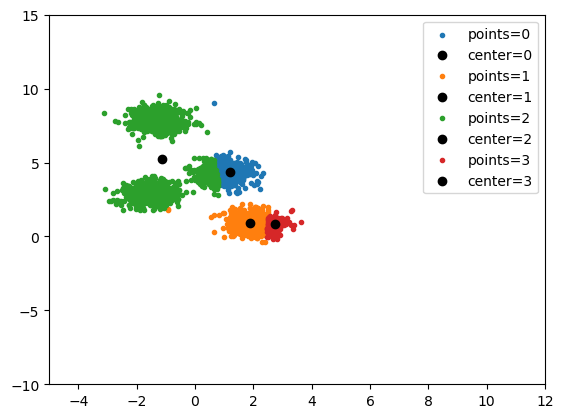

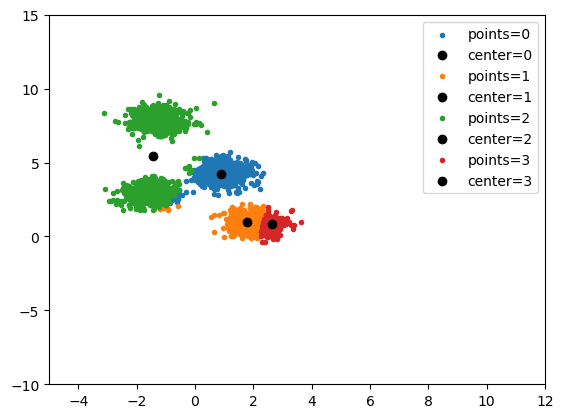

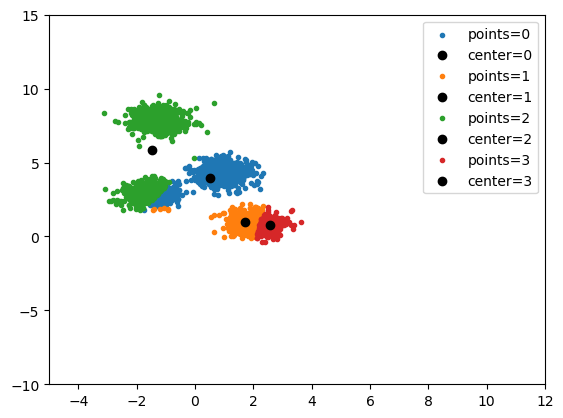

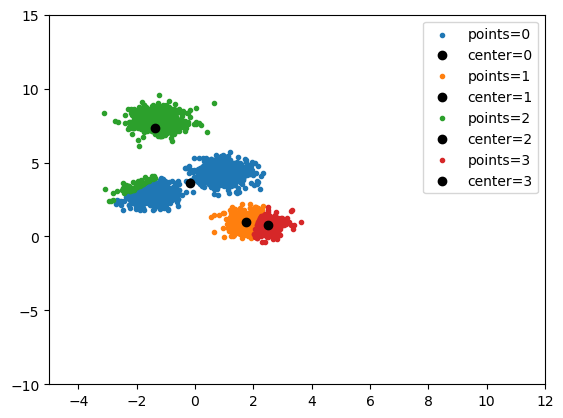

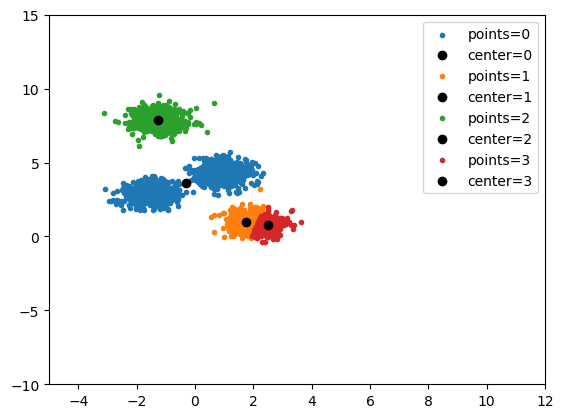

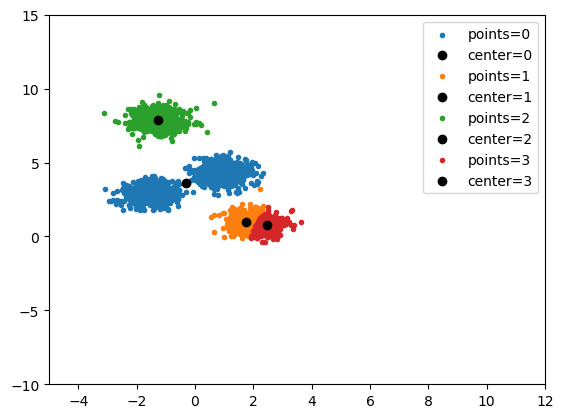

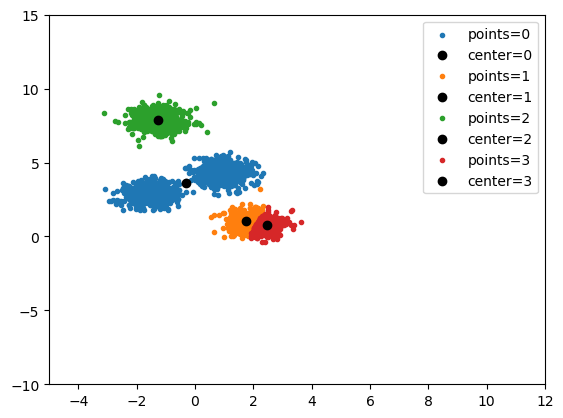

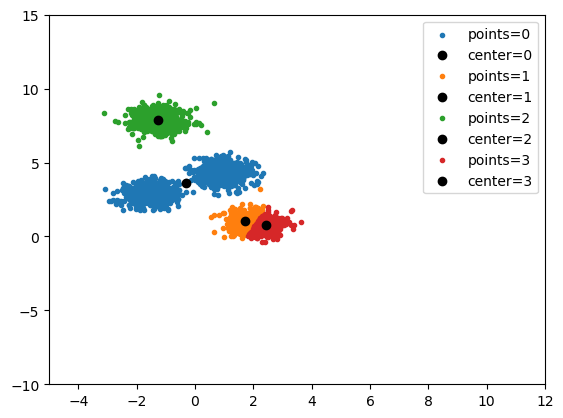

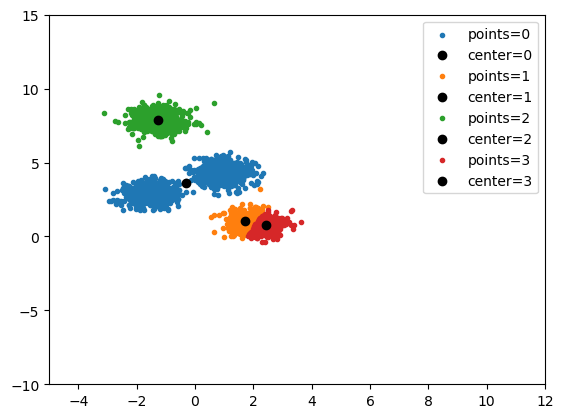

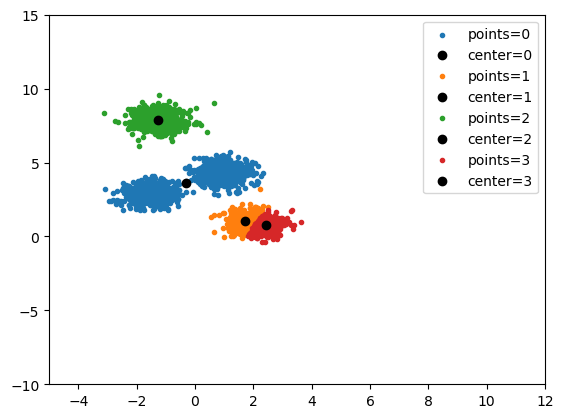

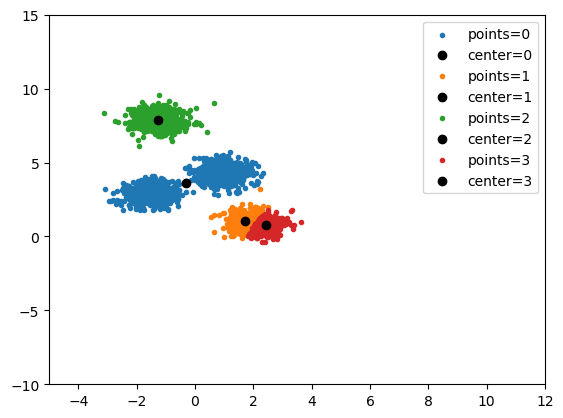

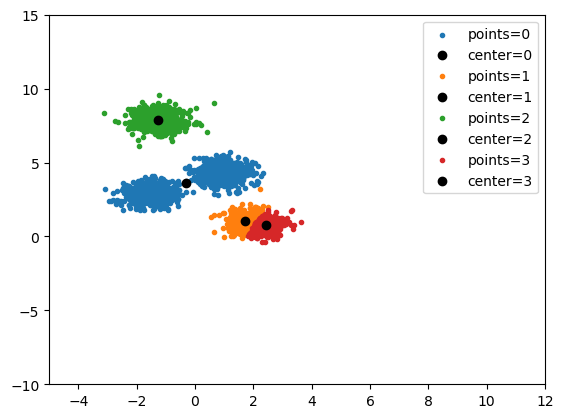

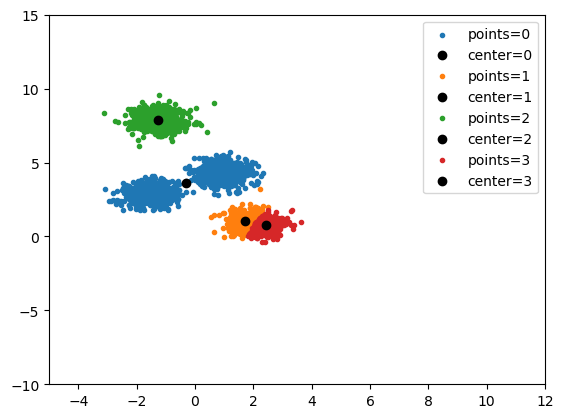

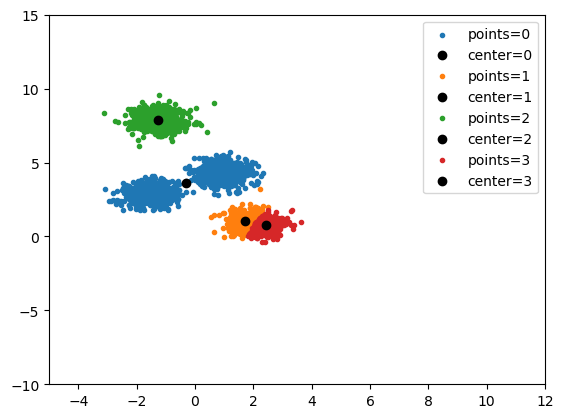

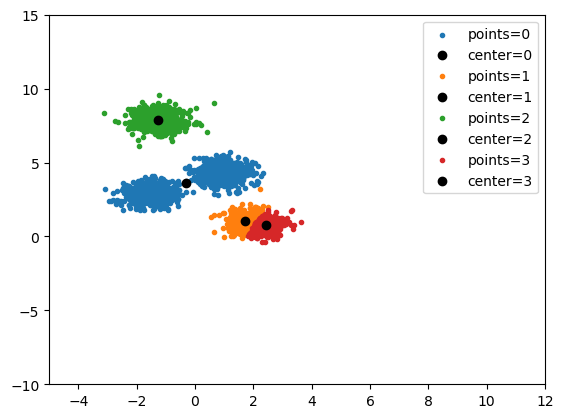

In [62]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]    # random centroids

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)


def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

animation_df = pd.DataFrame()  # only for animation

# Loop over iterations
for n in range(num_iters):  

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)
    
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    
    # only for animation (skip)
    adf = pd.DataFrame(np.zeros(len(data)))
    adf[['x', 'y']] = data
    adf['color'] = assigned_centroids
    adf['size'] = 5
    cdf = pd.DataFrame(np.zeros(num_clusters))
    cdf[['x','y']] = centroids
    cdf['color'] = 'red'
    cdf['size'] = 20
    adf = pd.concat([adf, cdf])
    adf['frame'] = n
    animation_df = pd.concat([animation_df, adf])


    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        
        # assign the new centroidq
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

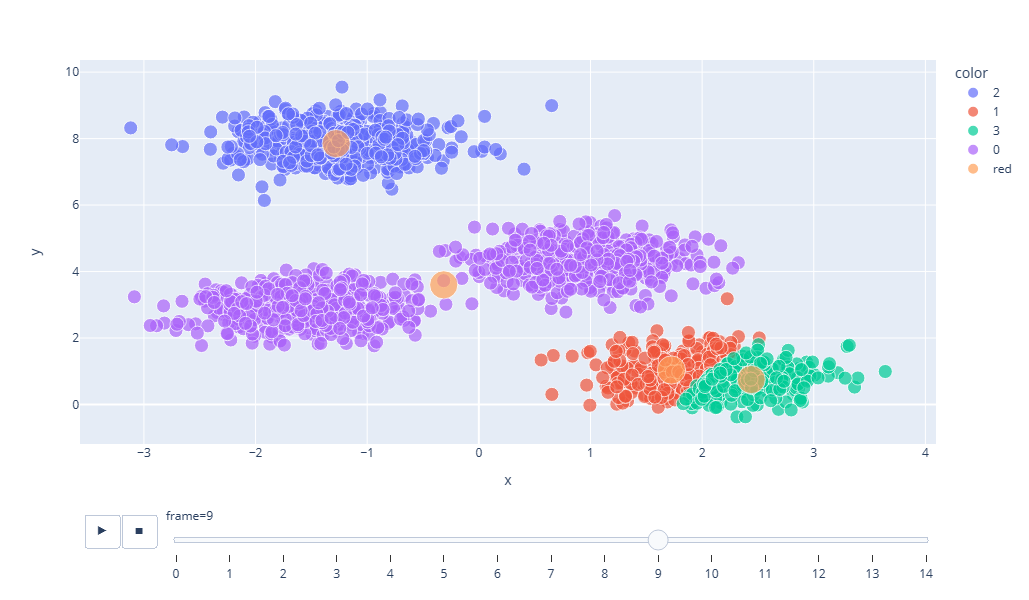

In [63]:
import plotly.express as px

px.scatter(animation_df, x="x", y="y", animation_frame="frame", color="color", size='size', width=800, height=600)

If you have any questions, connect with me:<br>
[Let's Connect](https://linktr.ee/khushalkumar31)